[('P1', 3), ('P2', 2), ('P3', 1), ('P4', 4), ('P5', 1), ('P6', 4), ('P7', 1), ('P8', 5), ('P9', 5), ('P10', 2)]


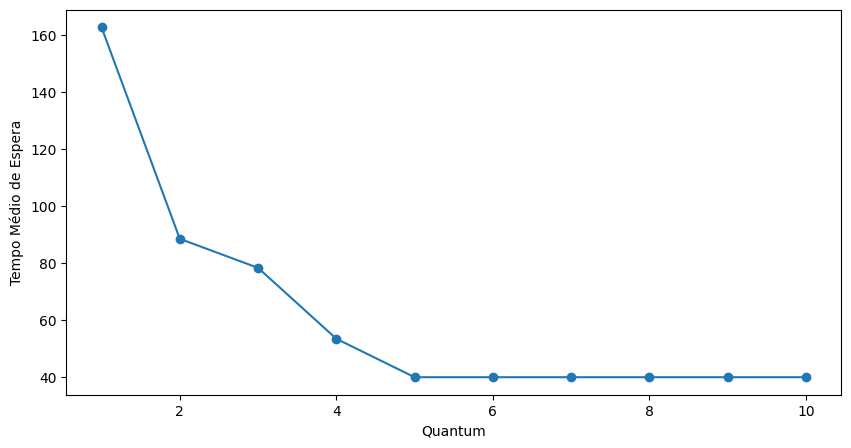

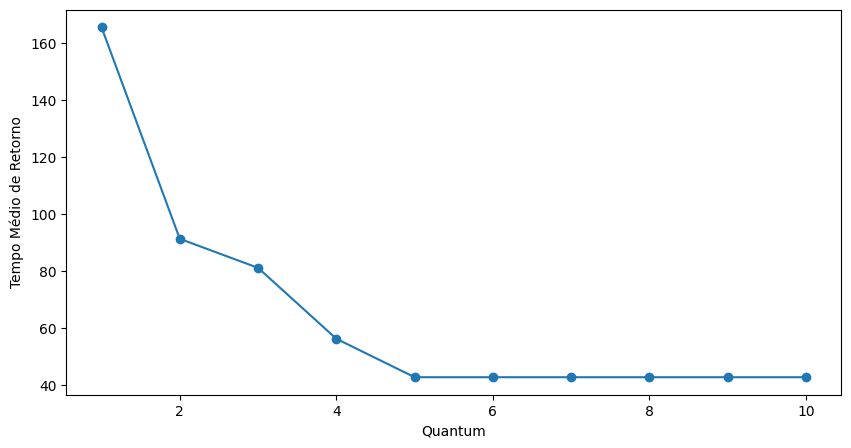

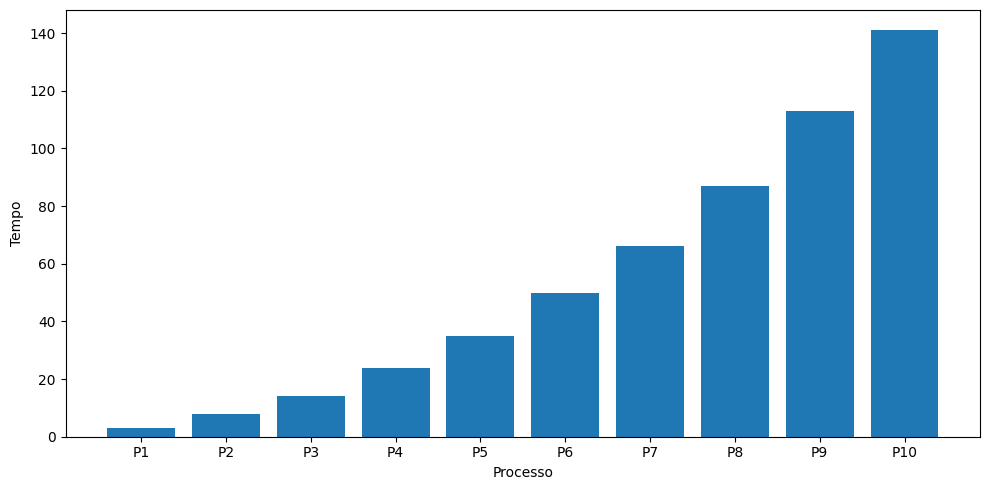

In [151]:
import matplotlib.pyplot as plt
import random

N = 10

processos = [("P1", 3), ("P2", 2), ("P3", 1), ("P4", 4)]

# Adiciona mais processos de forma dinâmica, se necessário
for i in range(4, N):
    processos.append(("P" + str(i + 1), random.randint(1, 5)))

quantum_valores = [1 + i for i in range(10)]

resultados = {"Tempo Médio de Espera": [], "Tempo Médio de Retorno": [], "Vazão": [], "Tempo de Conclusão": {}}

for quantum in quantum_valores:
    tempo_total = 0
    espera_total = 0
    retorno_total = 0
    vazao = [] #
    fila = []
    tempo_atual = 0
    tempo_conclusao = {}  # Para rastrear o tempo de conclusão de cada processo

    # # Inicialize uma lista para rastrear o tempo restante de cada processo
    # tempo_restante = [burst_time for _, burst_time in processos]
    # Inicialize uma lista para rastrear o tempo restante de cada processo
    tempo_restante = []
    # Iterar sobre os processos
    for _, burst_time in processos:
        if burst_time >= 0:
            tempo_restante.append(burst_time)
        else:
            tempo_restante.append(0)

    while any(tempo_restante):
        for i in range(N):
            processo, burst_time = processos[i]
            if tempo_restante[i] > 0:
                # O processo ainda não foi concluído
                if tempo_restante[i] <= quantum:
                    # O processo será concluído neste quantum
                    tempo_total += tempo_atual + tempo_restante[i]
                    espera_total += tempo_total - tempo_atual - burst_time
                    retorno_total += tempo_total - tempo_atual
                    vazao.append((tempo_atual, sum(1 for processo in processos if processo[1] >= 0 )))
                    tempo_atual += tempo_restante[i]
                    tempo_conclusao[processo] = tempo_total
                    tempo_restante[i] = 0
                else:
                    # O processo ainda tem tempo restante
                    tempo_total += tempo_atual + quantum
                    tempo_restante[i] -= quantum
                    tempo_atual += quantum  # Atualiza o tempo atual
                fila.append(i)

            else:
                fila.append(-1)  # Marca um slot vazio na fila

    # Cálculo do tempo médio de espera e tempo médio de retorno
    resultados["Tempo Médio de Espera"].append(espera_total / N)
    resultados["Tempo Médio de Retorno"].append(retorno_total / N)
    resultados["Vazão"].append(vazao)
    resultados["Tempo de Conclusão"] = tempo_conclusao

print(processos)

plt.figure(figsize=(10, 5))
plt.plot(quantum_valores, resultados["Tempo Médio de Espera"], marker='o')
plt.xlabel('Quantum')
plt.ylabel('Tempo Médio de Espera')

plt.figure(figsize=(10, 5))
plt.plot(quantum_valores, resultados["Tempo Médio de Retorno"], marker='o')
plt.xlabel('Quantum')
plt.ylabel('Tempo Médio de Retorno')

plt.figure(figsize=(10, 5))
plt.xlabel('Processo')
plt.ylabel('Tempo')
plt.bar(resultados["Tempo de Conclusão"].keys(), resultados["Tempo de Conclusão"].values())
plt.tight_layout()
plt.show()